This is purposefully a pretty quick and poorly-performing test, since we are not really training models for very long. Make sure you can run everything here successfully to get familiar with the BioAutoMATED platform!

In [1]:
import sys
sys.path.insert(1, 'main_classes/')
import warnings
warnings.filterwarnings("ignore")
from wrapper import run_bioautomated
import shutil
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make directory where these results can live - no need to run if already have a directory
#os.mkdir('./exemplars/')

Using TensorFlow backend.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

False

# General Parameters (can be changed)

### input arguments 
- task : str, one of 'binary_classification', 'multiclass_classification', 'regression'
- data_folder : str representing folder where data is stored
- data_file : str representing file name where data is stored
- sequence_type : str, either 'nucleic_acid', 'peptide', or 'glycan'
- model_folder : str representing folder where models are to be stored
- output_folder : str representing folder where output is to be stored
- automl_search_techniques : str representing which AutoML search technique should be performed, one of 'all', 'deepswarm', 'autokeras', 'tpot'
- do_backup : bool representing if a backup should be performed
- max_runtime_minutes : int representing max runtime for model search in minutes
- num_folds : int representing num folds
- verbosity : int representing 0=not verbose, 1=verbose
- do_auto_bin : bool representing if target values should be automatically binned
- bin_threshold : float representing threshold for positive and negative classes
- do_transform : bool representing if target values should be transformed
- input_col : str representing input column name where sequences can be located
- target_col : str representing target column name where target values can be located
- pad_seqs : str indicating pad_seqs method, either 'max', 'min', 'average'
- augment_data : str, either 'none', 'complement', 'reverse_complement', or 'both_complements'
- dataset_robustness : bool indicating if data ablation study should be performed
- num_final_epochs : int representing number of final epochs to train final deepswarm model
- yaml_params : dict of extra deepswarm parameters, with keys 'max_depth' (int), 'ant_count' (int), 'epochs' (int)
- num_generations : int representing number of generations of tpot search
- population_size : int representing population size of tpot search
- run_interpretation : bool indicating if interpretation module should be executed
- interpret_params : dict of extra interpretation parameters, with keys 'sample_number_class_activation_maps' (int), 'class_activation_grad_modifier' (str), 'class_activation_layer_index' (int), 'sample_number_saliency_maps' (int), 'saliency_map_grad_modifier' (str), 'saliency_map_layer_index' (int), 'sample_number_mutagenesis' (int)
- run_design : bool indicating if design module should be executed
- design_params : dict of extra design parameters, with keys 'k' (int), 'substitution_type' (str), 'target_y' (float), 'class_of_interest' (int), 'constraint_file_path' (str), 'de_novo_num_seqs_to_test' (int), 'storm_num_seqs_to_test' (int), 'num_of_optimization_rounds' (int)

In [3]:
# specify parameters for the actual search (example)
max_runtime_minutes = 60 # time in minutes to give to each implemented AutoML algorithms
num_folds = 2 # recommend 3 - 5 folds for robustness

# Deepswarm execution
num_final_epochs = 10
yaml_params = {'ant_count': 1, 'max_depth': 2, 'epochs': 5}

# TPOT execution
num_generations = 5
population_size = 5

Note that this runtime (10 minutes) may be too short for your machine's computing capabilites (see note under Troubleshooting in the Installation Guide). If so, please change max_runtime_minutes to 60. Make sure to reset the graph operations of BioAutoMATED by restarting the kernel (Kernel --> Restart) before trying to run again.

# Synthetic Nucleic Acids Dataset

Verbosity set to 1. For fewer display items, set verbosity to 0.
#################################################################################################
#######################               RUNNING REGRESSION                  #######################
#################################################################################################

#################################################################################################
##############################            RUNNING DEEPSWARM           ###########################
#################################################################################################
Conducting architecture search now...
Confirmed: All sequence characters are in alphabet
Confirmed: No need to pad or truncate, all sequences same length
Confirmed: No data augmentation requested


-------------------------------DeepSwarm settings-------------------------------
{
    "DeepSwarm": {
        "aco": {
            "ant_count": 1,
            "greediness": 0.5,
            "pheromone": {
                "decay": 0.1,
                "evaporation": 0.1,
                "start": 0.1,
                "verbose": false
            }
        },
        "backend": {
            "batch_size": 64,
            "epochs": 5,
            "loss": "mean_squared_error",
            "patience": 5,
            "verbose": 1
        },
        "flat_nodes": [
            "FlattenNode",
            "DenseNode",
            "DropoutFlatNode",
            "BatchNormalizationFlatNode"
        ],
        "max_depth": 2,
        "metrics": "loss",
        "reuse_patience": 1,
        "save_folder": "./wenxiao1117/output/R_P_CDS/models/deepswarm/regression/",
        "spatial_nodes": [
            "InputNode",
            "Conv2DNode",
            "DropoutSpatialNode",
            "BatchNormali

Confirmed: Scrambled control generated.
Deepswarm TFK Backend: Created!
Deepswarm Object: Created!


------------------------------STARTING ACO SEARCH-------------------------------


Train on 308 samples, validate on 35 samples
Epoch 1/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.3032 - mean_squared_error: 0.3032
Epoch 00001: val_loss improved from inf to 1.36997, saving model to temp-model
308/308 [==============================] - 0s 682us/sample - loss: 1.1915 - mean_squared_error: 1.1915 - val_loss: 1.3700 - val_mean_squared_error: 1.3700
Epoch 2/5
 64/308 [=====>........................] - ETA: 0s - loss: 1.0599 - mean_squared_error: 1.0599
Epoch 00002: val_loss improved from 1.36997 to 0.69913, saving model to temp-model
308/308 [==============================] - 0s 226us/sample - loss: 0.6451 - mean_squared_error: 0.6451 - val_loss: 0.6991 - val_mean_squared_error: 0.6991
Epoch 3/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.8543 - mean_squared_error: 0.8543
Epoch 00003: val_loss improved from 0.69913 to 0.42383, saving model to temp-model
308/308 [==============================] - 0s 241us/sample - loss: 0.4920 - mean_squa

 Ant: 0x7f7e000c4990 
 Loss: 0.300244 
 Accuracy: 0.300244 
 Path: InputNode(shape:(250, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:3) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: d4c5bccc25c0ca4e4beadba74284eafb103c5c37340d83a55562775b85feafac 
---------------------------Current search depth is 1----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 308 samples, validate on 35 samples
Epoch 1/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.3314 - mean_squared_error: 0.3314
Epoch 00001: val_loss improved from inf to 0.34454, saving model to temp-model
308/308 [==============================] - 0s 715us/sample - loss: 0.6075 - mean_squared_error: 0.6075 - val_loss: 0.3445 - val_mean_squared_error: 0.3445
Epoch 2/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.2430 - mean_squared_error: 0.2430
Epoch 00002: val_loss improved from 0.34454 to 0.32106, saving model to temp-model
308/308 [==============================] - 0s 251us/sample - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 0.3211 - val_mean_squared_error: 0.3211
Epoch 3/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.2294 - mean_squared_error: 0.2294
Epoch 00003: val_loss improved from 0.32106 to 0.29633, saving model to temp-model
308/308 [==============================] - 0s 229us/sample - loss: 0.2859 - mean_squa

 Ant: 0x7f7df8ccb550 
 Loss: 0.252140 
 Accuracy: 0.252140 
 Path: InputNode(shape:(250, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:7) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 69d25859c41313e275ce6d30e7713ffc095abb9959bb3d413cb5ea13bc443e43 
-------------------------------NEW BEST ANT FOUND-------------------------------
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7f7df8ccb550 
 Loss: 0.252140 
 Accuracy: 0.252140 
 Path: InputNode(shape:(250, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:7) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 69d25859c41313e275ce6d30e7713ffc095abb9959bb3d413cb5ea13bc443e43 
---------------------------Current search depth is 2----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 308 samples, validate on 35 samples
Epoch 1/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.3655 - mean_squared_error: 0.3655
Epoch 00001: val_loss improved from inf to 0.52777, saving model to temp-model
308/308 [==============================] - 0s 903us/sample - loss: 0.7099 - mean_squared_error: 0.7099 - val_loss: 0.5278 - val_mean_squared_error: 0.5278
Epoch 2/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.4082 - mean_squared_error: 0.4082
Epoch 00002: val_loss did not improve from 0.52777
308/308 [==============================] - 0s 177us/sample - loss: 0.4387 - mean_squared_error: 0.4387 - val_loss: 0.5471 - val_mean_squared_error: 0.5471
Epoch 3/5
 64/308 [=====>........................] - ETA: 0s - loss: 0.5398 - mean_squared_error: 0.5398
Epoch 00003: val_loss improved from 0.52777 to 0.29329, saving model to temp-model
308/308 [==============================] - 0s 783us/sample - loss: 0.4415 - mean_squared_error: 0.4415 - val_loss: 0.

 Ant: 0x7f7deccc8950 
 Loss: 0.306611 
 Accuracy: 0.306611 
 Path: InputNode(shape:(250, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:5) -> Pool2DNode(pool_size:2, pool_type:max, stride:2) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 6b258398229836f10ab4ef2d74188727afb643315dbd039b79dd5a742469379b 
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7f7df8ccb550 
 Loss: 0.252140 
 Accuracy: 0.252140 
 Path: InputNode(shape:(250, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:7) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 69d25859c41313e275ce6d30e7713ffc095abb9959bb3d413cb5ea13bc443e43 


Deepswarm Topology: Found!


-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


230/230 [==============================] - ETA: 0s - loss: 0.3142 - mean_squared_error: 0.31 - 0s 195us/sample - loss: 0.2521 - mean_squared_error: 0.2521


Accuracy is 0.252140 and loss is 0.252140


Deepswarm Preliminary Topology Evaluation: Done!
230/230 [==============================] - ETA: 0s - loss: 0.3142 - mean_squared_error: 0.31 - 0s 94us/sample - loss: 0.2521 - mean_squared_error: 0.2521
Epoch 1/10
35/35 [==============================] ETA: 0s - loss: 0.3077 - mean_squared_error: 0.3077 - 0s 121us/sample - loss: 0.2426 - mean_squared_error: 0.2426

Epoch 00001: val_loss improved from inf to 0.24256, saving model to temp-model
5/5 [==============================] - 0s 41ms/step - loss: 0.2060 - mean_squared_error: 0.2066 - val_loss: 0.2426 - val_mean_squared_error: 0.2426
Epoch 2/10
35/35 [==============================] ETA: 0s - loss: 0.1316 - mean_squared_error: 0.1316 - 0s 124us/sample - loss: 0.1817 - mean_squared_error: 0.1817

Epoch 00002: val_loss improved from 0.24256 to 0.18174, saving model to temp-model
5/5 [==============================] - 1s 103ms/step - loss: 0.1350 - mean_squared_error: 0.1351 - val_loss: 0.1817 - val_mean_squared_error: 0.1817
Epoch 3/

-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


230/230 [==============================] - ETA: 0s - loss: 0.2917 - mean_squared_error: 0.29 - 0s 191us/sample - loss: 0.2161 - mean_squared_error: 0.2161


Accuracy is 0.216093 and loss is 0.216093


Deepswarm Topology Evaluation: Completed!
Deepswarm Results: Saved!
Current fold: 1
Train on 257 samples, validate on 29 samples
Epoch 1/10
257/257 [==============================] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.05 - 0s 654us/sample - loss: 0.1380 - mean_squared_error: 0.1380 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 2/10
287/287 [==============================] - ETA: 0s - loss: 0.1975 - mean_squared_error: 0.19 - 0s 92us/sample - loss: 0.2186 - mean_squared_error: 0.2186


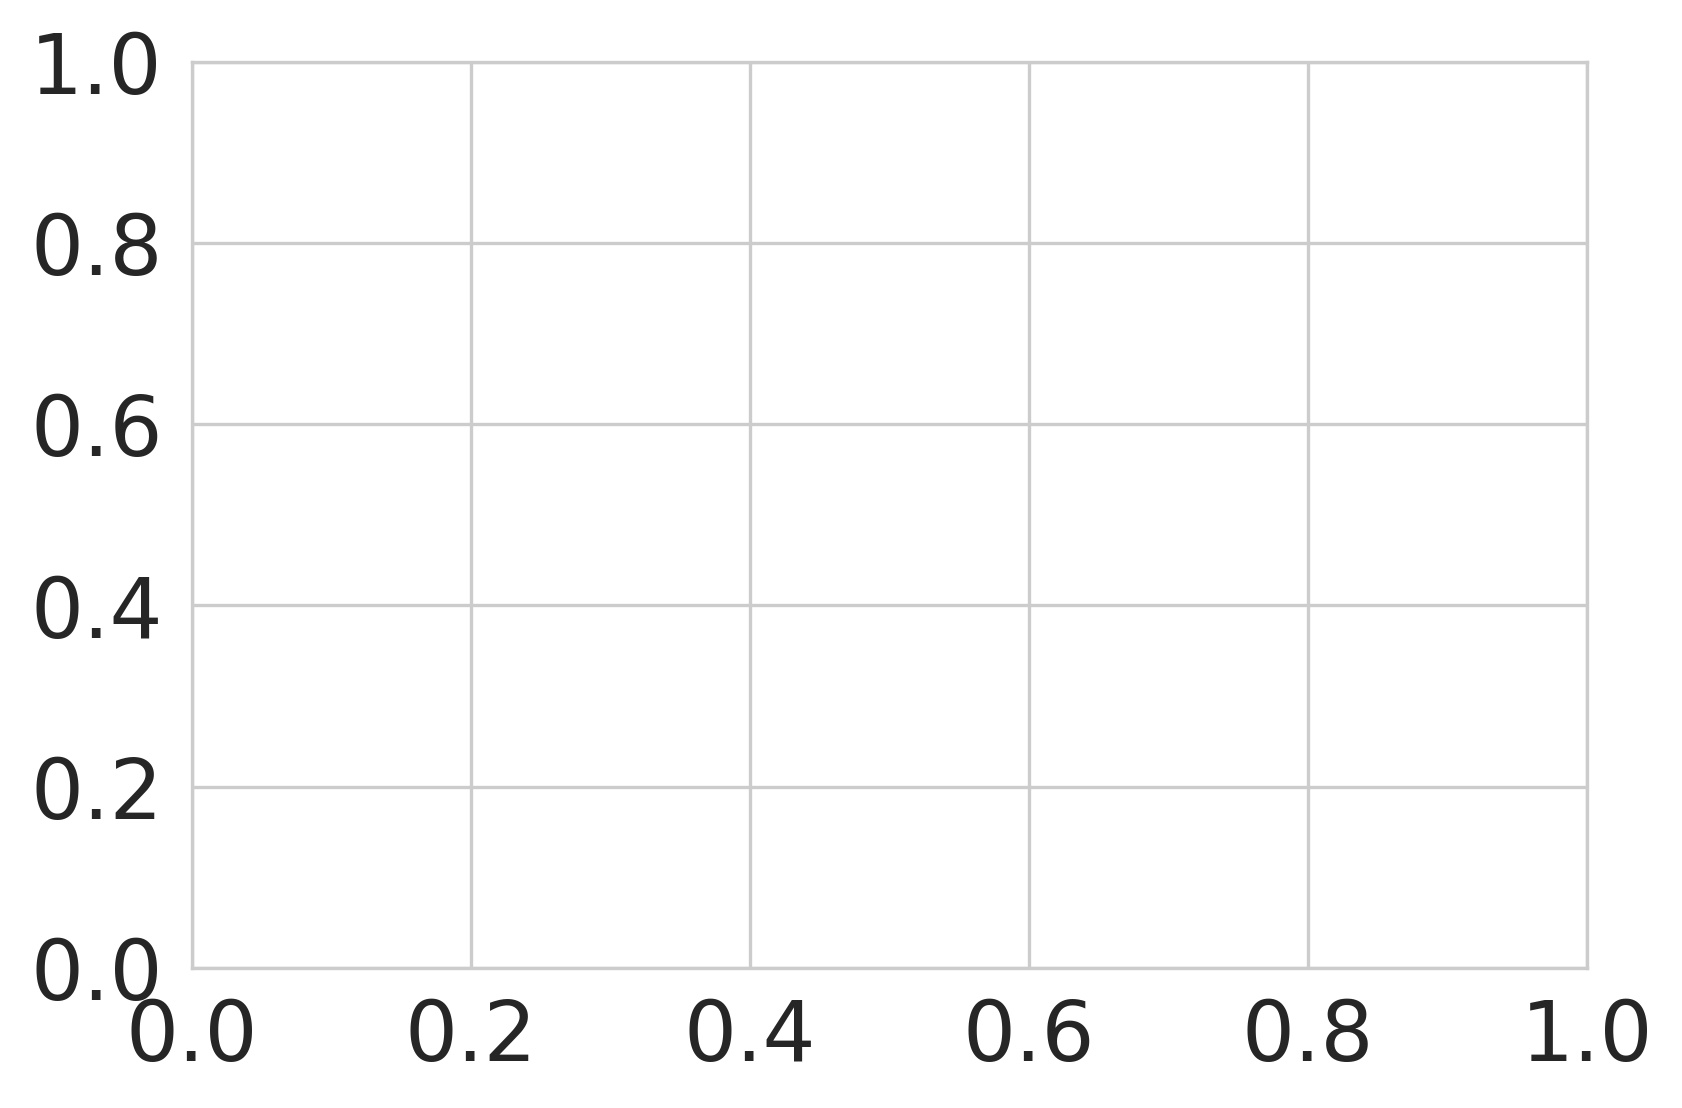

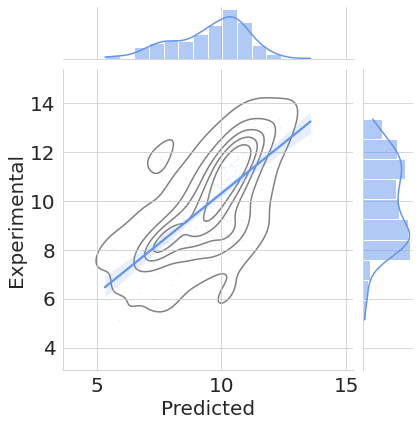

Current fold: 2
Train on 258 samples, validate on 29 samples
Epoch 1/10
258/258 [==============================] - ETA: 0s - loss: 0.0836 - mean_squared_error: 0.08 - ETA: 0s - loss: 0.2143 - mean_squared_error: 0.21 - 0s 768us/sample - loss: 0.2156 - mean_squared_error: 0.2156 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 2/10
286/286 [==============================] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.11 - 0s 88us/sample - loss: 0.1194 - mean_squared_error: 0.1194


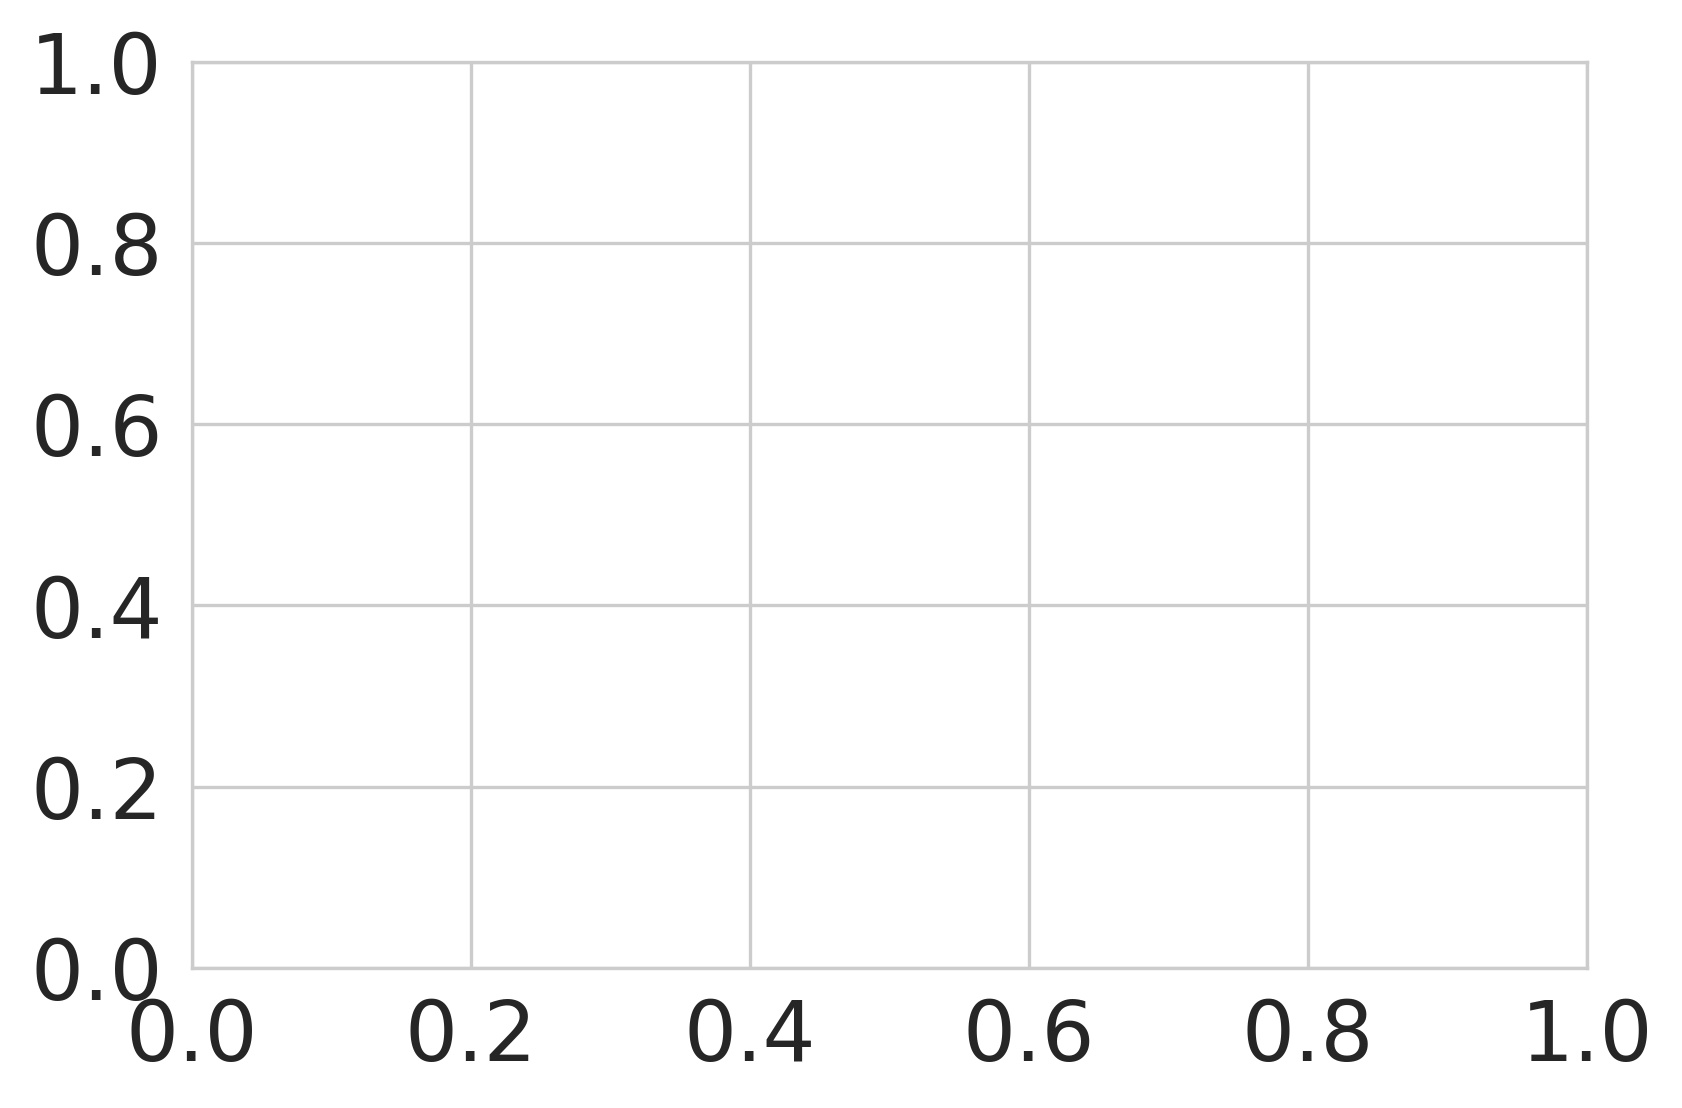

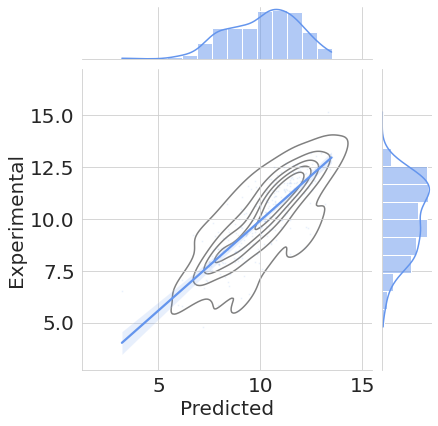

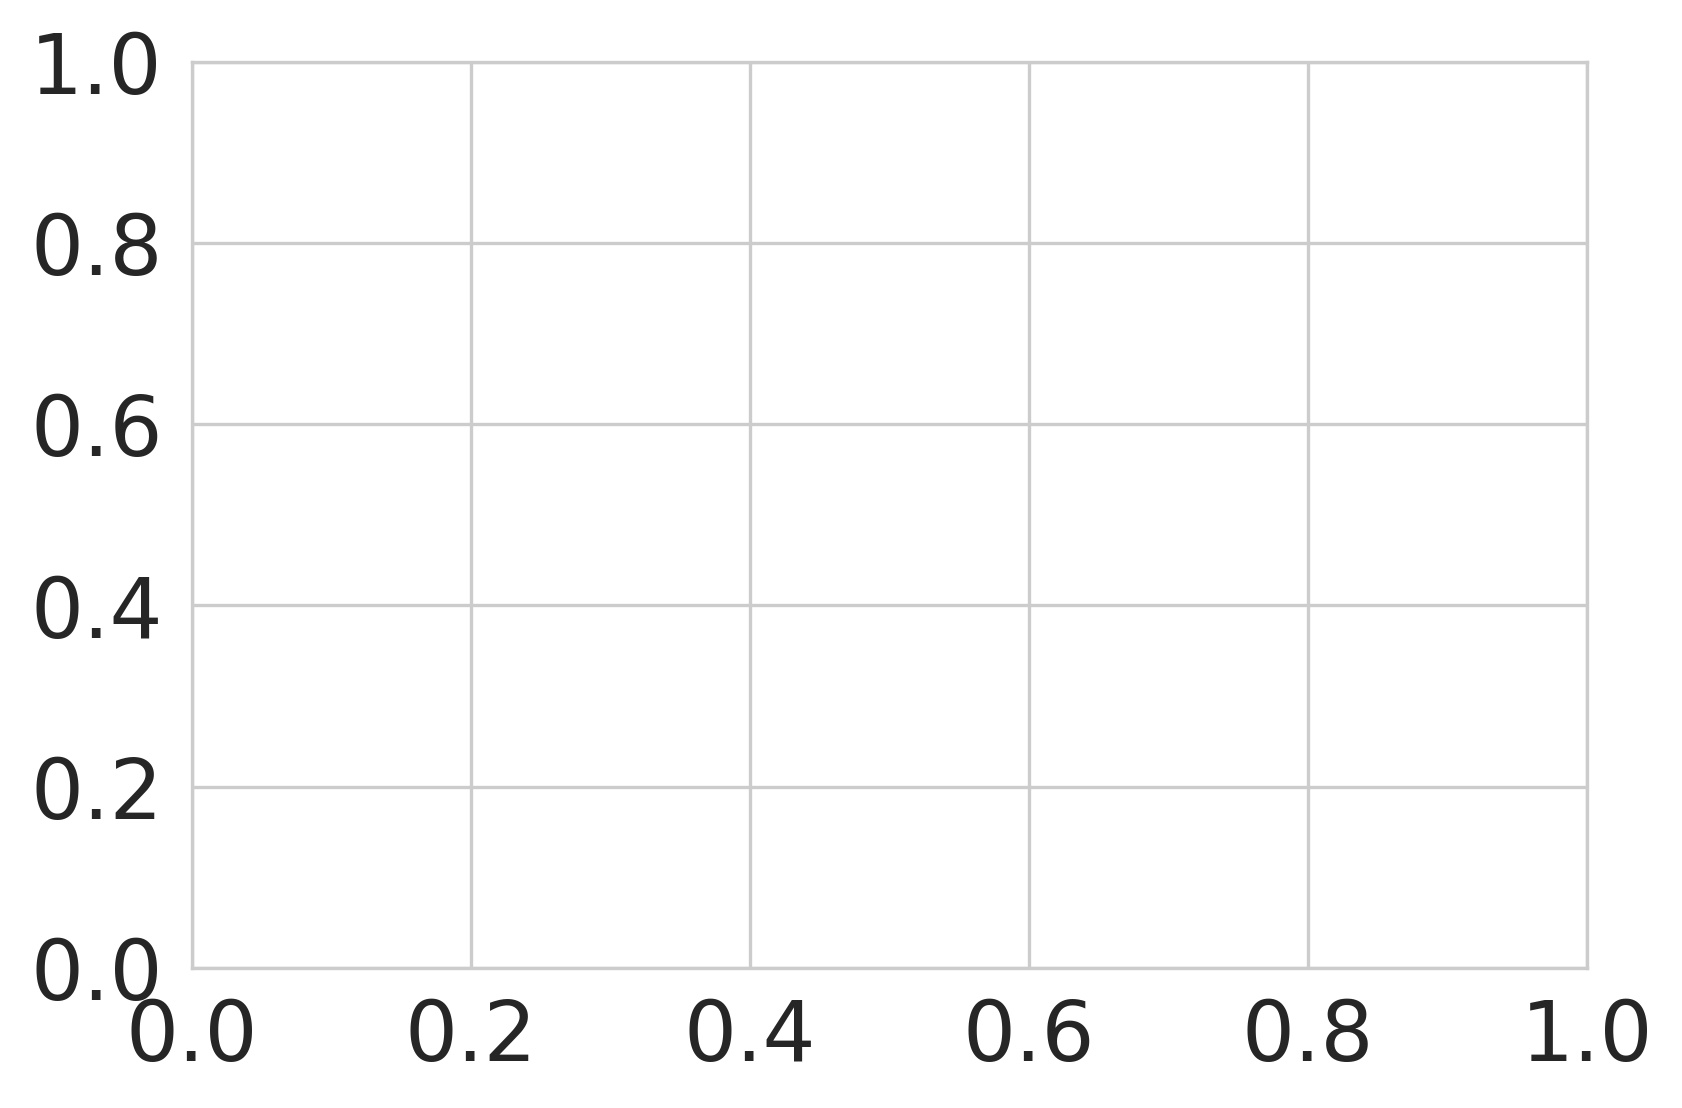

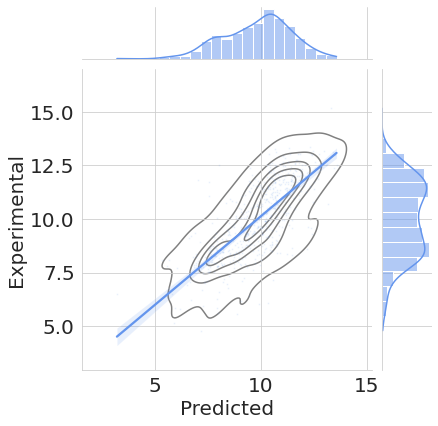

Metrics over folds: 
	Average r2:  0.5774195791014686
	Std of r2:  0.11330027039617593
	Overall r2: 0.5657482809540573, Average r2 over folds: 0.5774195791014686
Testing scrambled control now...
Current fold: 1
Train on 257 samples, validate on 29 samples
Epoch 1/10
257/257 [==============================] - 0s 828us/sample - loss: 0.4167 - mean_squared_error: 0.4167 - val_loss: 0.3672 - val_mean_squared_error: 0.3672
Epoch 2/10
257/257 [==============================] - 0s 256us/sample - loss: 0.2701 - mean_squared_error: 0.2701 - val_loss: 0.3581 - val_mean_squared_error: 0.3581
Epoch 3/10
257/257 [==============================] - 0s 253us/sample - loss: 0.1577 - mean_squared_error: 0.1577 - val_loss: 0.3469 - val_mean_squared_error: 0.3469
Epoch 4/10
257/257 [==============================] - 0s 257us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.3378 - val_mean_squared_error: 0.3378
Epoch 5/10
257/257 [==============================] - 0s 238us/sample - loss: 0.

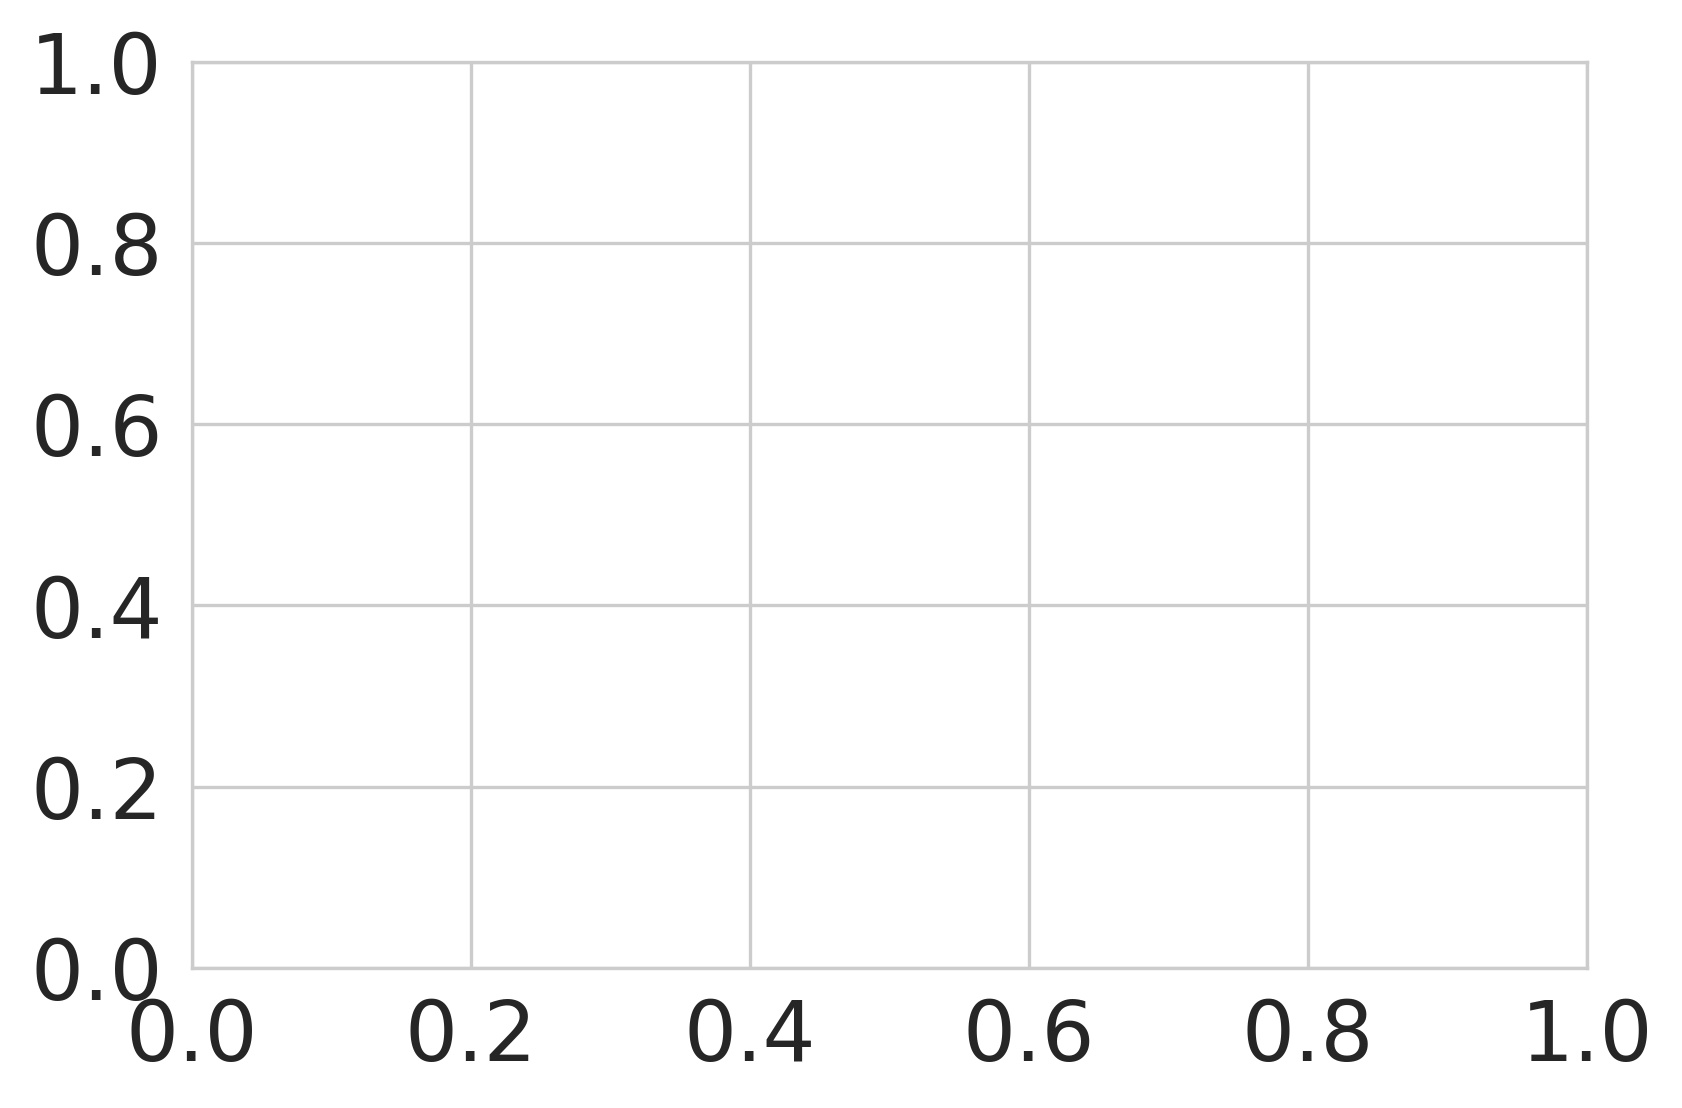

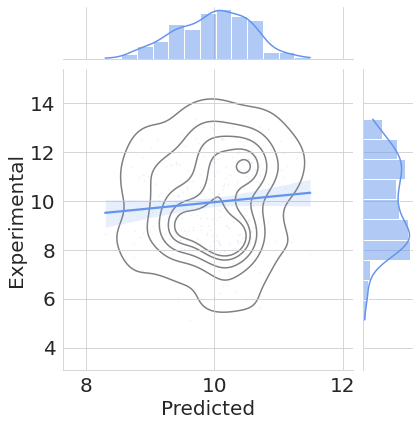

Current fold: 2
Train on 258 samples, validate on 29 samples
Epoch 1/10
258/258 [==============================] - 0s 857us/sample - loss: 0.3885 - mean_squared_error: 0.3885 - val_loss: 0.3866 - val_mean_squared_error: 0.3866
Epoch 2/10
258/258 [==============================] - 0s 232us/sample - loss: 0.2395 - mean_squared_error: 0.2395 - val_loss: 0.3580 - val_mean_squared_error: 0.3580
Epoch 3/10
286/286 [==============================] - 0s 87us/sample - loss: 0.4309 - mean_squared_error: 0.4309


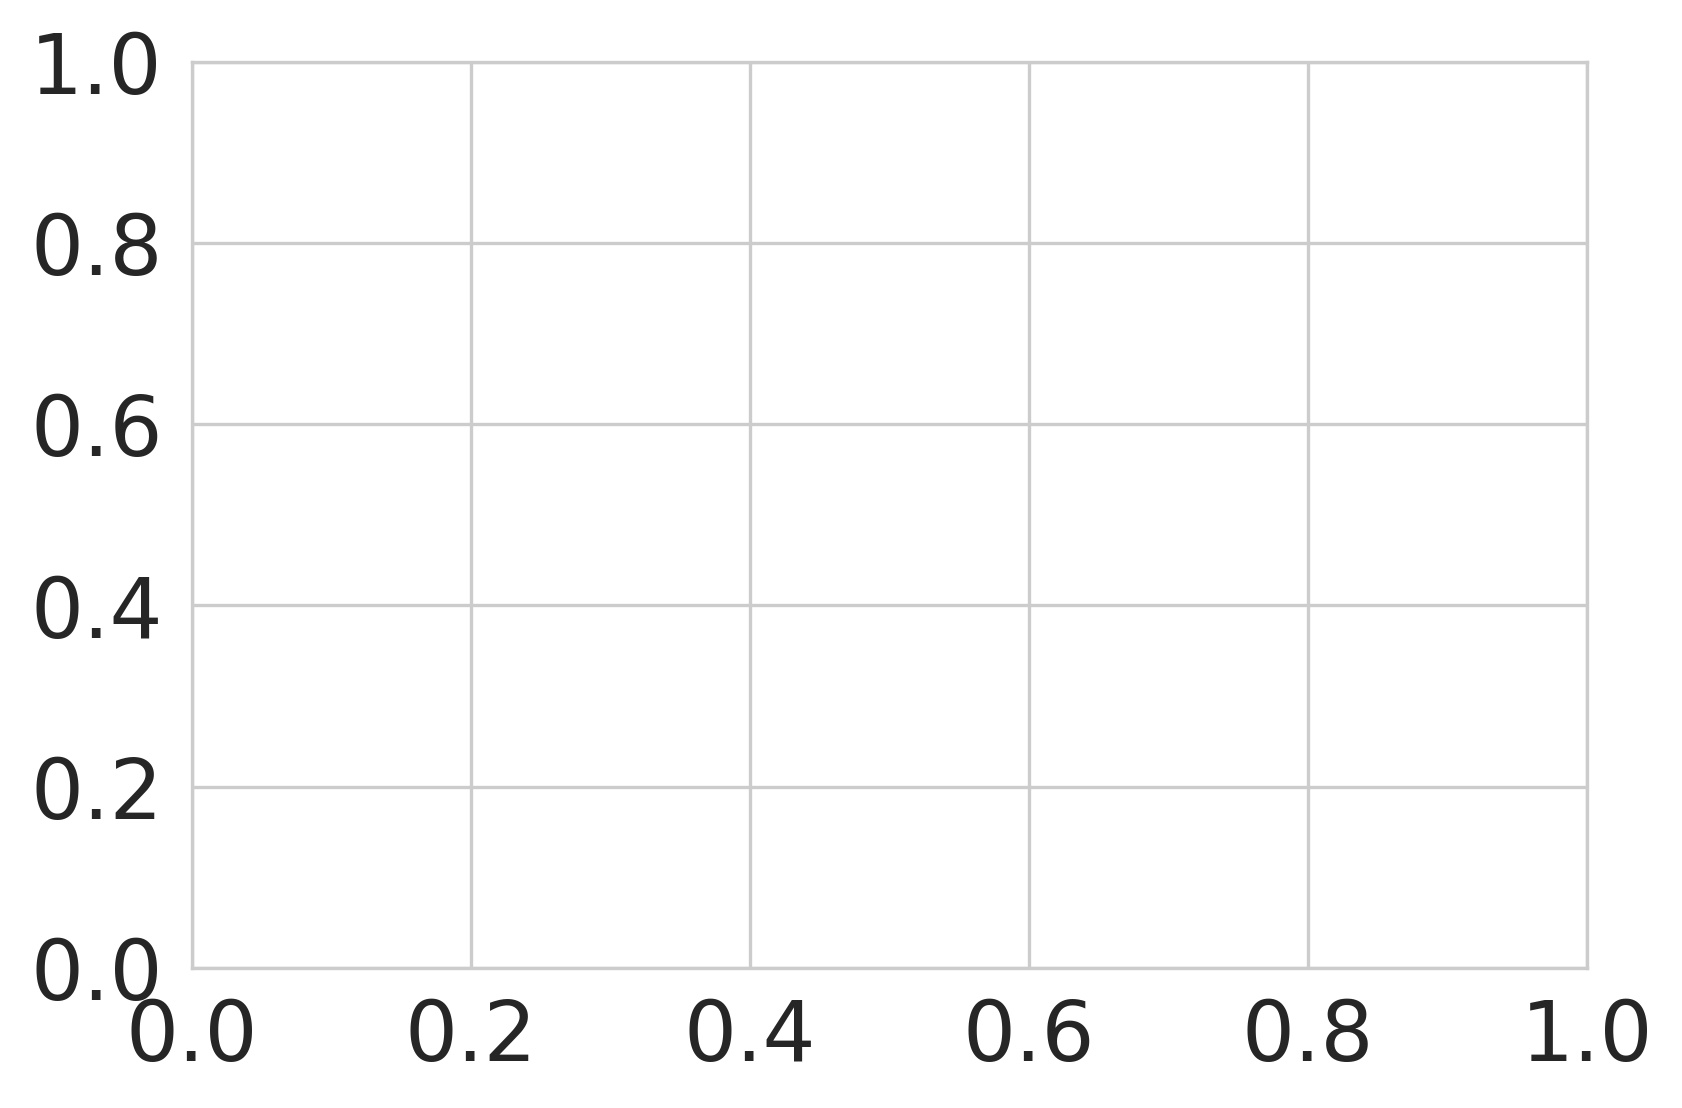

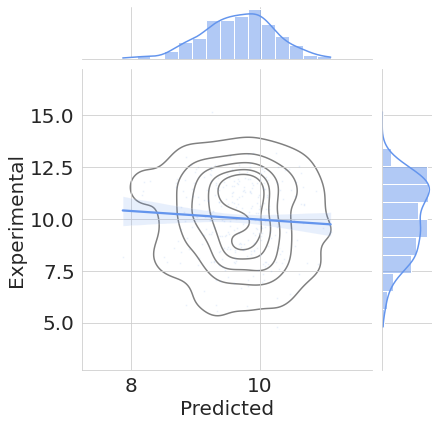

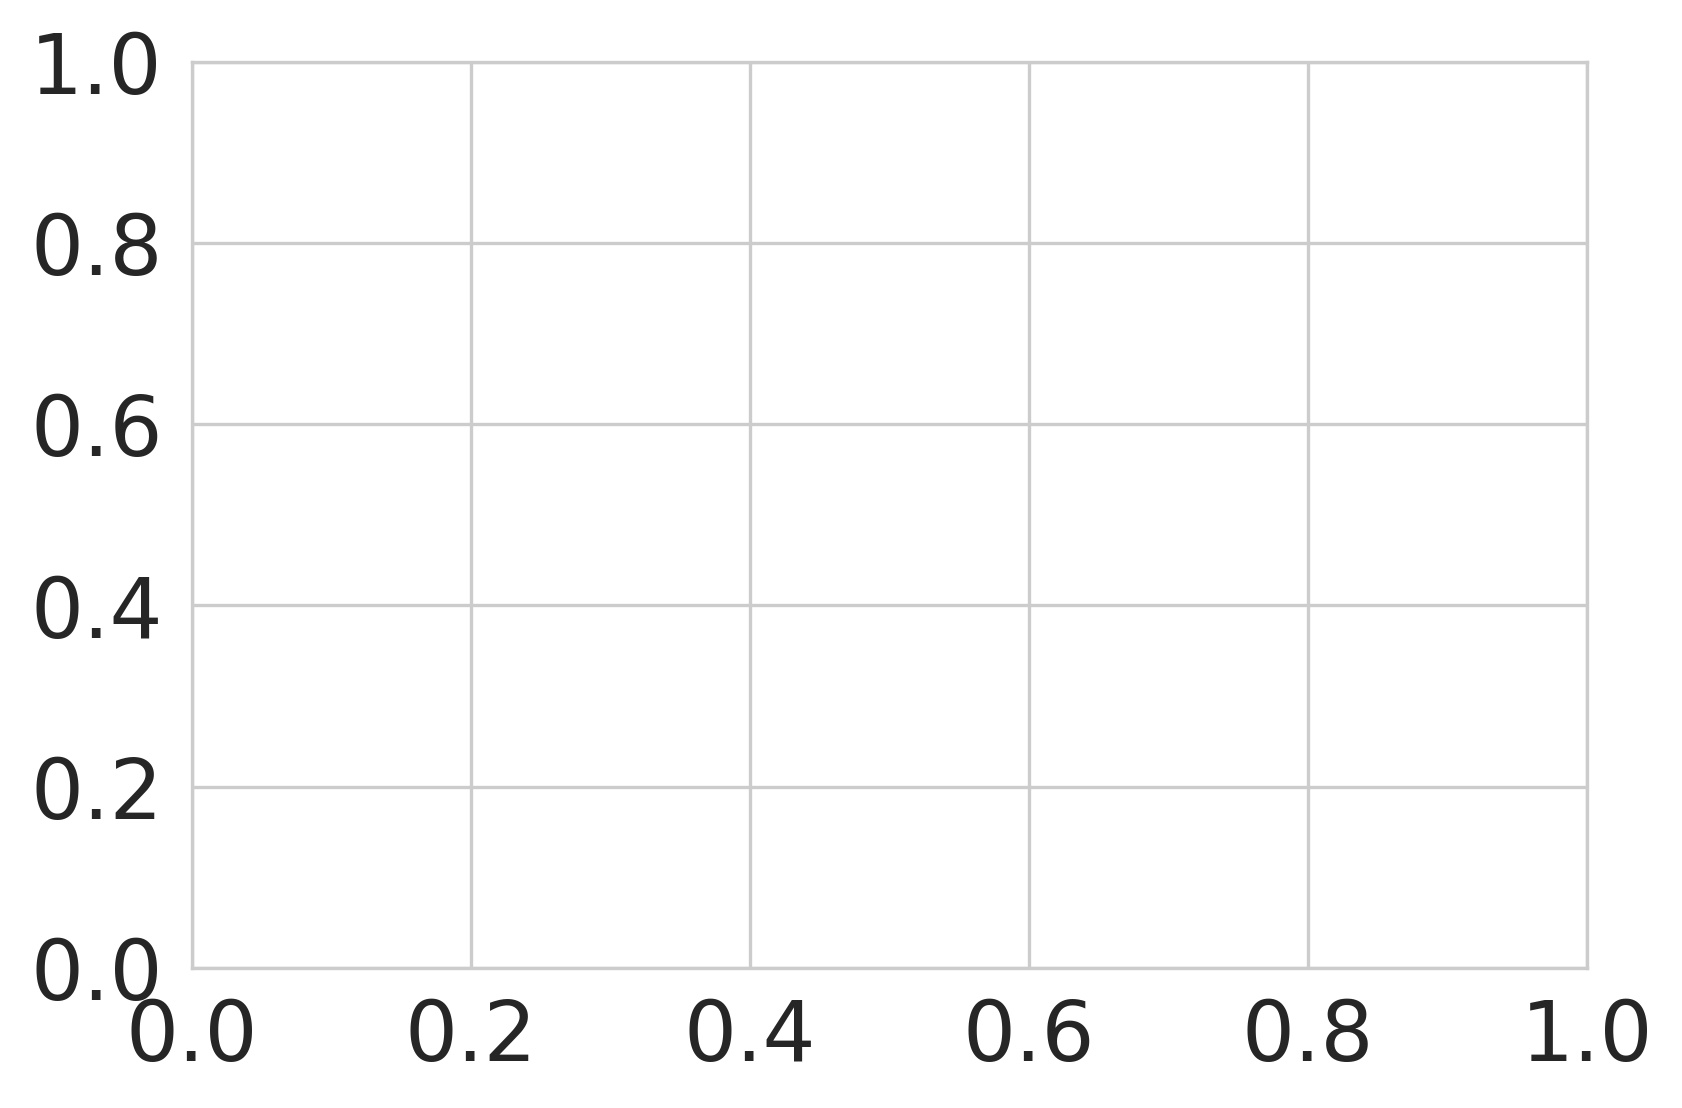

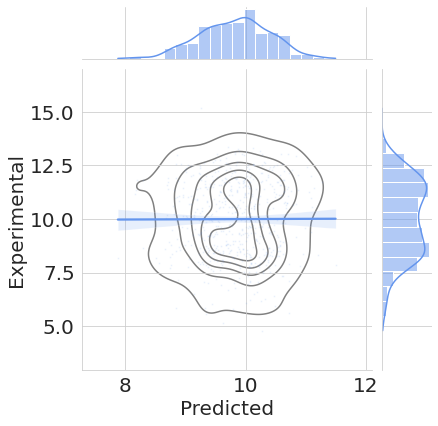

Metrics over folds: 
	Average r2:  0.005539462046140328
	Std of r2:  0.001413750079703765
	Overall r2: 1.1626395589027246e-05, Average r2 over folds: 0.005539462046140328
Fitting final model now...
Train on 515 samples, validate on 58 samples
Epoch 1/10
515/515 [==============================] - 0s 630us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 2/10
515/515 [==============================] - 0s 250us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.1691 - val_mean_squared_error: 0.1691
#################################################################################################
##############################            RUNNING AUTOKERAS           ###########################
#################################################################################################
Conducting architecture search now...
Confirmed: All sequence characters are in alphabet
Confirmed: No need to pad or truncate, all

In [4]:
os.mkdir('./wenxiao1117/output/R_P_CDS/')

data_folder = './wenxiao1117/data/'
data_file = 'R_P_CDS.csv'
input_col = 'Seq'
target_col = 'OD'
sequence_type = 'nucleic_acid'
verbosity = 1
task = 'regression' # binary_classification, multiclass_classification, regression

# Specify target folders for saving models and results
# Generic here - will add the tags specifying classification/regression
# as well as specific for the AutoML tool being used (i.e. /tpot/)
model_folder = './wenxiao1117/output/R_P_CDS/models/'
output_folder = './wenxiao1117/output/R_P_CDS/outputs/'

run_bioautomated(task, data_folder, data_file, sequence_type, model_folder, output_folder, input_col=input_col, target_col=target_col, max_runtime_minutes=max_runtime_minutes, num_folds=num_folds, verbosity=verbosity, num_final_epochs=num_final_epochs, yaml_params=yaml_params, num_generations=num_generations, population_size=population_size)
